In [1]:
from ripple_heterogeneity.utils import loading
import nelpy as nel
from neo.rawio import neuroscoperawio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from xml.etree import ElementTree


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
basepath = r'Z:/Data/HMC1/day8'
st,cell_metrics = loading.load_spikes(basepath,brainRegion="CA1")

In [3]:
ripples = loading.load_ripples_events(basepath)
ripples = nel.EpochArray(np.array([ripples.start,ripples.stop]).T)
ripples

<EpochArray at 0x166024d6fa0: 6,641 epochs> of length 7:31:796 minutes

In [4]:
def parse_xml_channel_groups(filename):
    filename = filename.replace('.xml', '').replace('.dat', '')

    tree = ElementTree.parse(filename + '.xml')
    root = tree.getroot()

    # find channels
    channel_group = []
    for grp_index, xml_chx in enumerate(
            root.find('anatomicalDescription').find('channelGroups').findall('group')):
        for xml_rc in xml_chx:
            channel_group.append([int(xml_rc.text),grp_index])
    return np.array(channel_group)

In [5]:
basename = os.path.basename(basepath)
reader = neuroscoperawio.NeuroScopeRawIO(os.path.join(basepath,basename))
reader.parse_header()

In [6]:
channel_group = parse_xml_channel_groups(reader.filename)
shank = 9
channel_indexes = channel_group[channel_group[:,1] == shank,0]

In [7]:
# epoch of time around ripple, which was previously found
seconds_idx = np.array([7.320,7.620])
# convert to index
to_idx = (seconds_idx*reader.get_signal_sampling_rate()).astype(int)
# get chunk of data
raw_sigs = reader.get_analogsignal_chunk(i_start=to_idx[0],
                                        i_stop=to_idx[1],
                                        channel_indexes=channel_indexes)

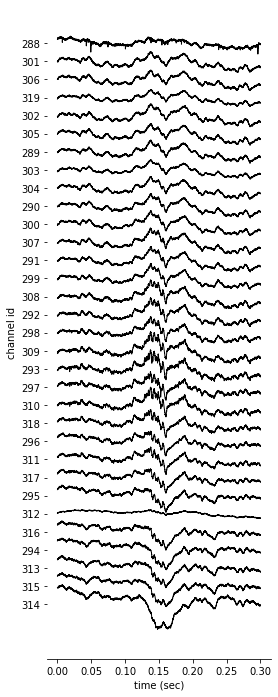

In [8]:
plt.figure(figsize=(4,12))
channel_offset = -np.arange(raw_sigs.shape[1])*4500
x = np.arange(raw_sigs.shape[0]) / reader.get_signal_sampling_rate()
plt.plot(x,raw_sigs + channel_offset,color='k',linewidth=1)
ax = plt.gca()
ax.set_yticks(channel_offset)
ax.set_yticklabels(channel_indexes)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.xlabel('time (sec)')
plt.ylabel('channel id')
plt.show()

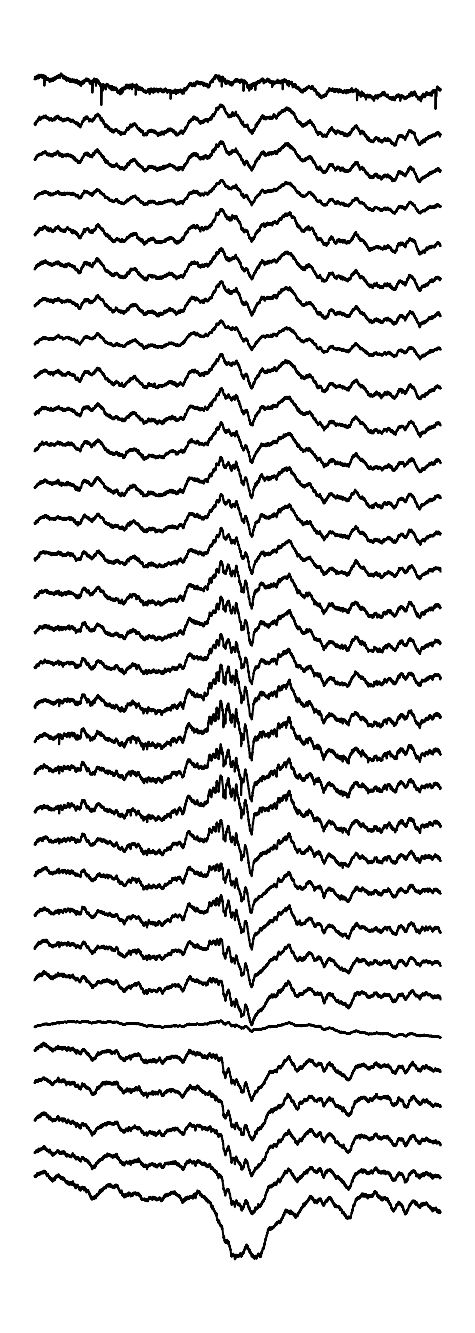

In [14]:
from ripple_heterogeneity.utils import functions
functions.set_plotting_defaults()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

plt.figure(figsize=(4,12))
channel_offset = -np.arange(raw_sigs.shape[1])*4500
x = np.arange(raw_sigs.shape[0]) / reader.get_signal_sampling_rate()
plt.plot(x,raw_sigs + channel_offset,color='k',linewidth=1)
ax = plt.gca()
ax.set_yticks(channel_offset)
ax.set_yticklabels(channel_indexes)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.xlabel('time (sec)')
plt.ylabel('channel id')
plt.axis("off")

plt.savefig(
    os.path.join(fig_save_path, "ripple_depth_example_v2.svg"),
    dpi=300,
    bbox_inches="tight",
)

In [45]:
ripples = ripples.expand(0.05)

In [55]:
rip = 4205
# epoch of time around ripple, which was previously found
seconds_idx = np.array([ripples[rip].start,ripples[rip].stop])
# convert to index
to_idx = (seconds_idx*reader.get_signal_sampling_rate()).astype(int)
# get chunk of data
raw_sigs = reader.get_analogsignal_chunk(i_start=to_idx[0],
                                        i_stop=to_idx[1],
                                        channel_indexes=[293])

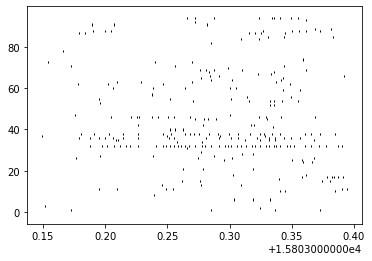

In [59]:
plt.eventplot(st[ripples[rip]].data,color='k',linewidth=1)
plt.show()

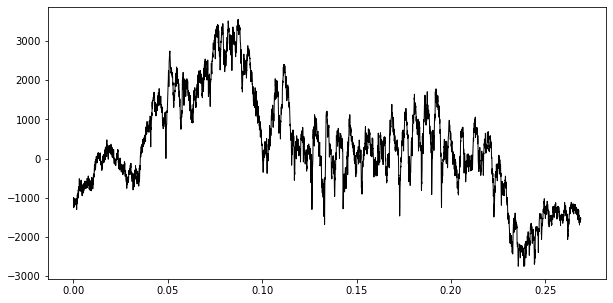

In [56]:
plt.figure(figsize=(10,5))
channel_offset = -np.arange(raw_sigs.shape[1])*4500
x = np.arange(raw_sigs.shape[0]) / reader.get_signal_sampling_rate()
plt.plot(x,raw_sigs + channel_offset,color='k',linewidth=1)
plt.show()